In [21]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [5]:
X,y=make_blobs(n_samples=[2000,50],centers=np.array([[2.7,2.7],[4,4]]),cluster_std=[0.6,0.3],random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

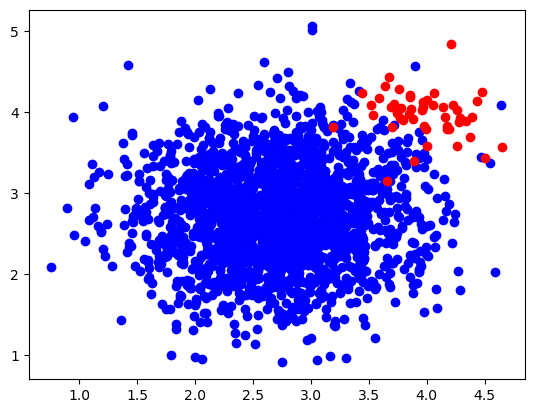

In [7]:
plt.scatter(X[y==0,0],X[y==0,1],c='blue',label='class 0')
plt.scatter(X[y==1,0],X[y==1,1],c='red',label='class 1')
plt.show()

In [9]:
svm = Pipeline([
    ('scaler',StandardScaler()),
    ('model',SVC(kernel='rbf',class_weight={0:.3,1:.7}))
])
svm.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(class_weight={0: 0.3, 1: 0.7}))])

In [12]:
ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled=ros.fit_resample(X_train,y_train)


In [14]:
svm = Pipeline([
    ('scaler',StandardScaler()),
    ('model',SVC(kernel='rbf'))
])
svm.fit(X_resampled,y_resampled)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [15]:
rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled=rus.fit_resample(X_train,y_train)

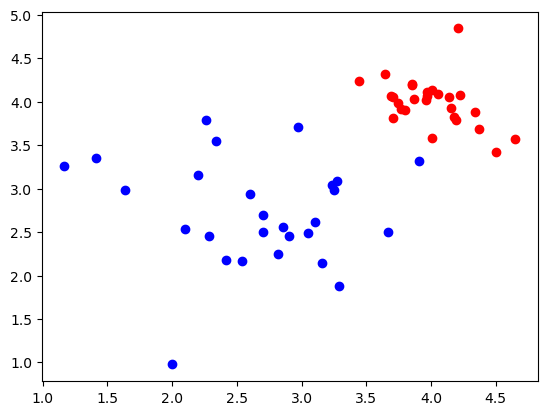

In [16]:
plt.scatter(X_resampled[y_resampled==1,0],X_resampled[y_resampled==1,1],c='red',label='class 0')
plt.scatter(X_resampled[y_resampled==0,0],X_resampled[y_resampled==0,1],c='blue',label='class 1')
plt.show()

In [18]:
sm = SMOTE(random_state=42)
X_resampled,y_resampled=sm.fit_resample(X_train,y_train)

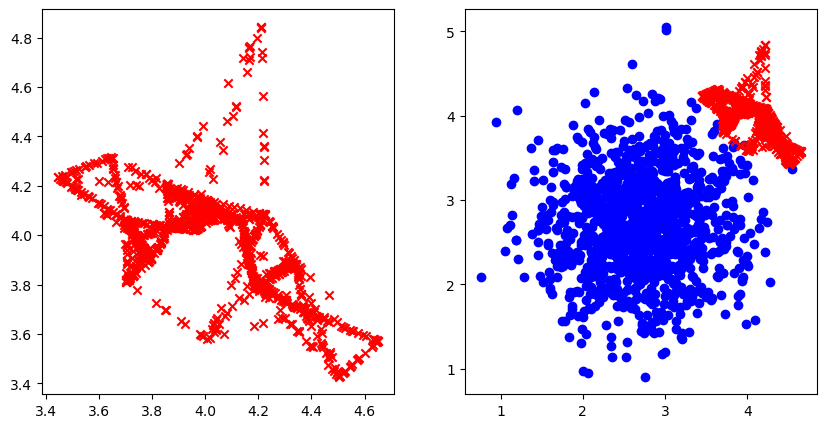

In [19]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(X_resampled[y_resampled==1,0],X_resampled[y_resampled==1,1],c='red',marker="x",label='class 0')
axs[1].scatter(X_resampled[y_resampled==0,0],X_resampled[y_resampled==0,1],c='blue',marker="o",label='class 1')
axs[1].scatter(X_resampled[y_resampled==1,0],X_resampled[y_resampled==1,1],c='red',marker="x",label='class 0')
plt.show()

In [22]:
ada = ADASYN(random_state=42)
X_resampled,y_resampled=ada.fit_resample(X_train,y_train)

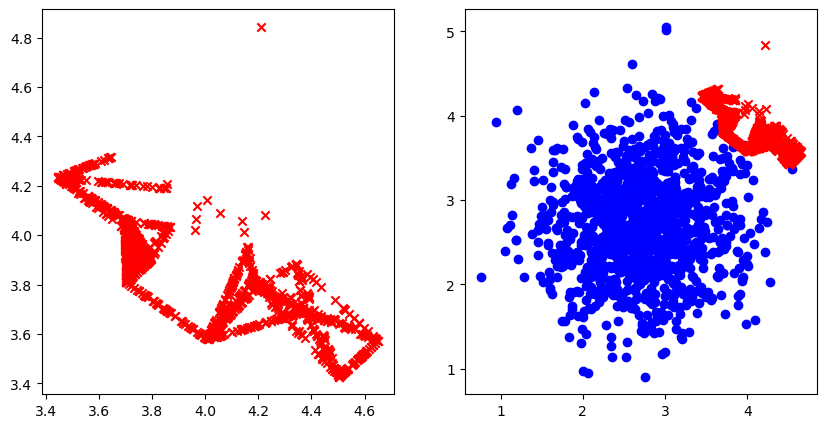

In [23]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(X_resampled[y_resampled==1,0],X_resampled[y_resampled==1,1],c='red',marker="x",label='class 0')
axs[1].scatter(X_resampled[y_resampled==0,0],X_resampled[y_resampled==0,1],c='blue',marker="o",label='class 1')
axs[1].scatter(X_resampled[y_resampled==1,0],X_resampled[y_resampled==1,1],c='red',marker="x",label='class 0')
plt.show()